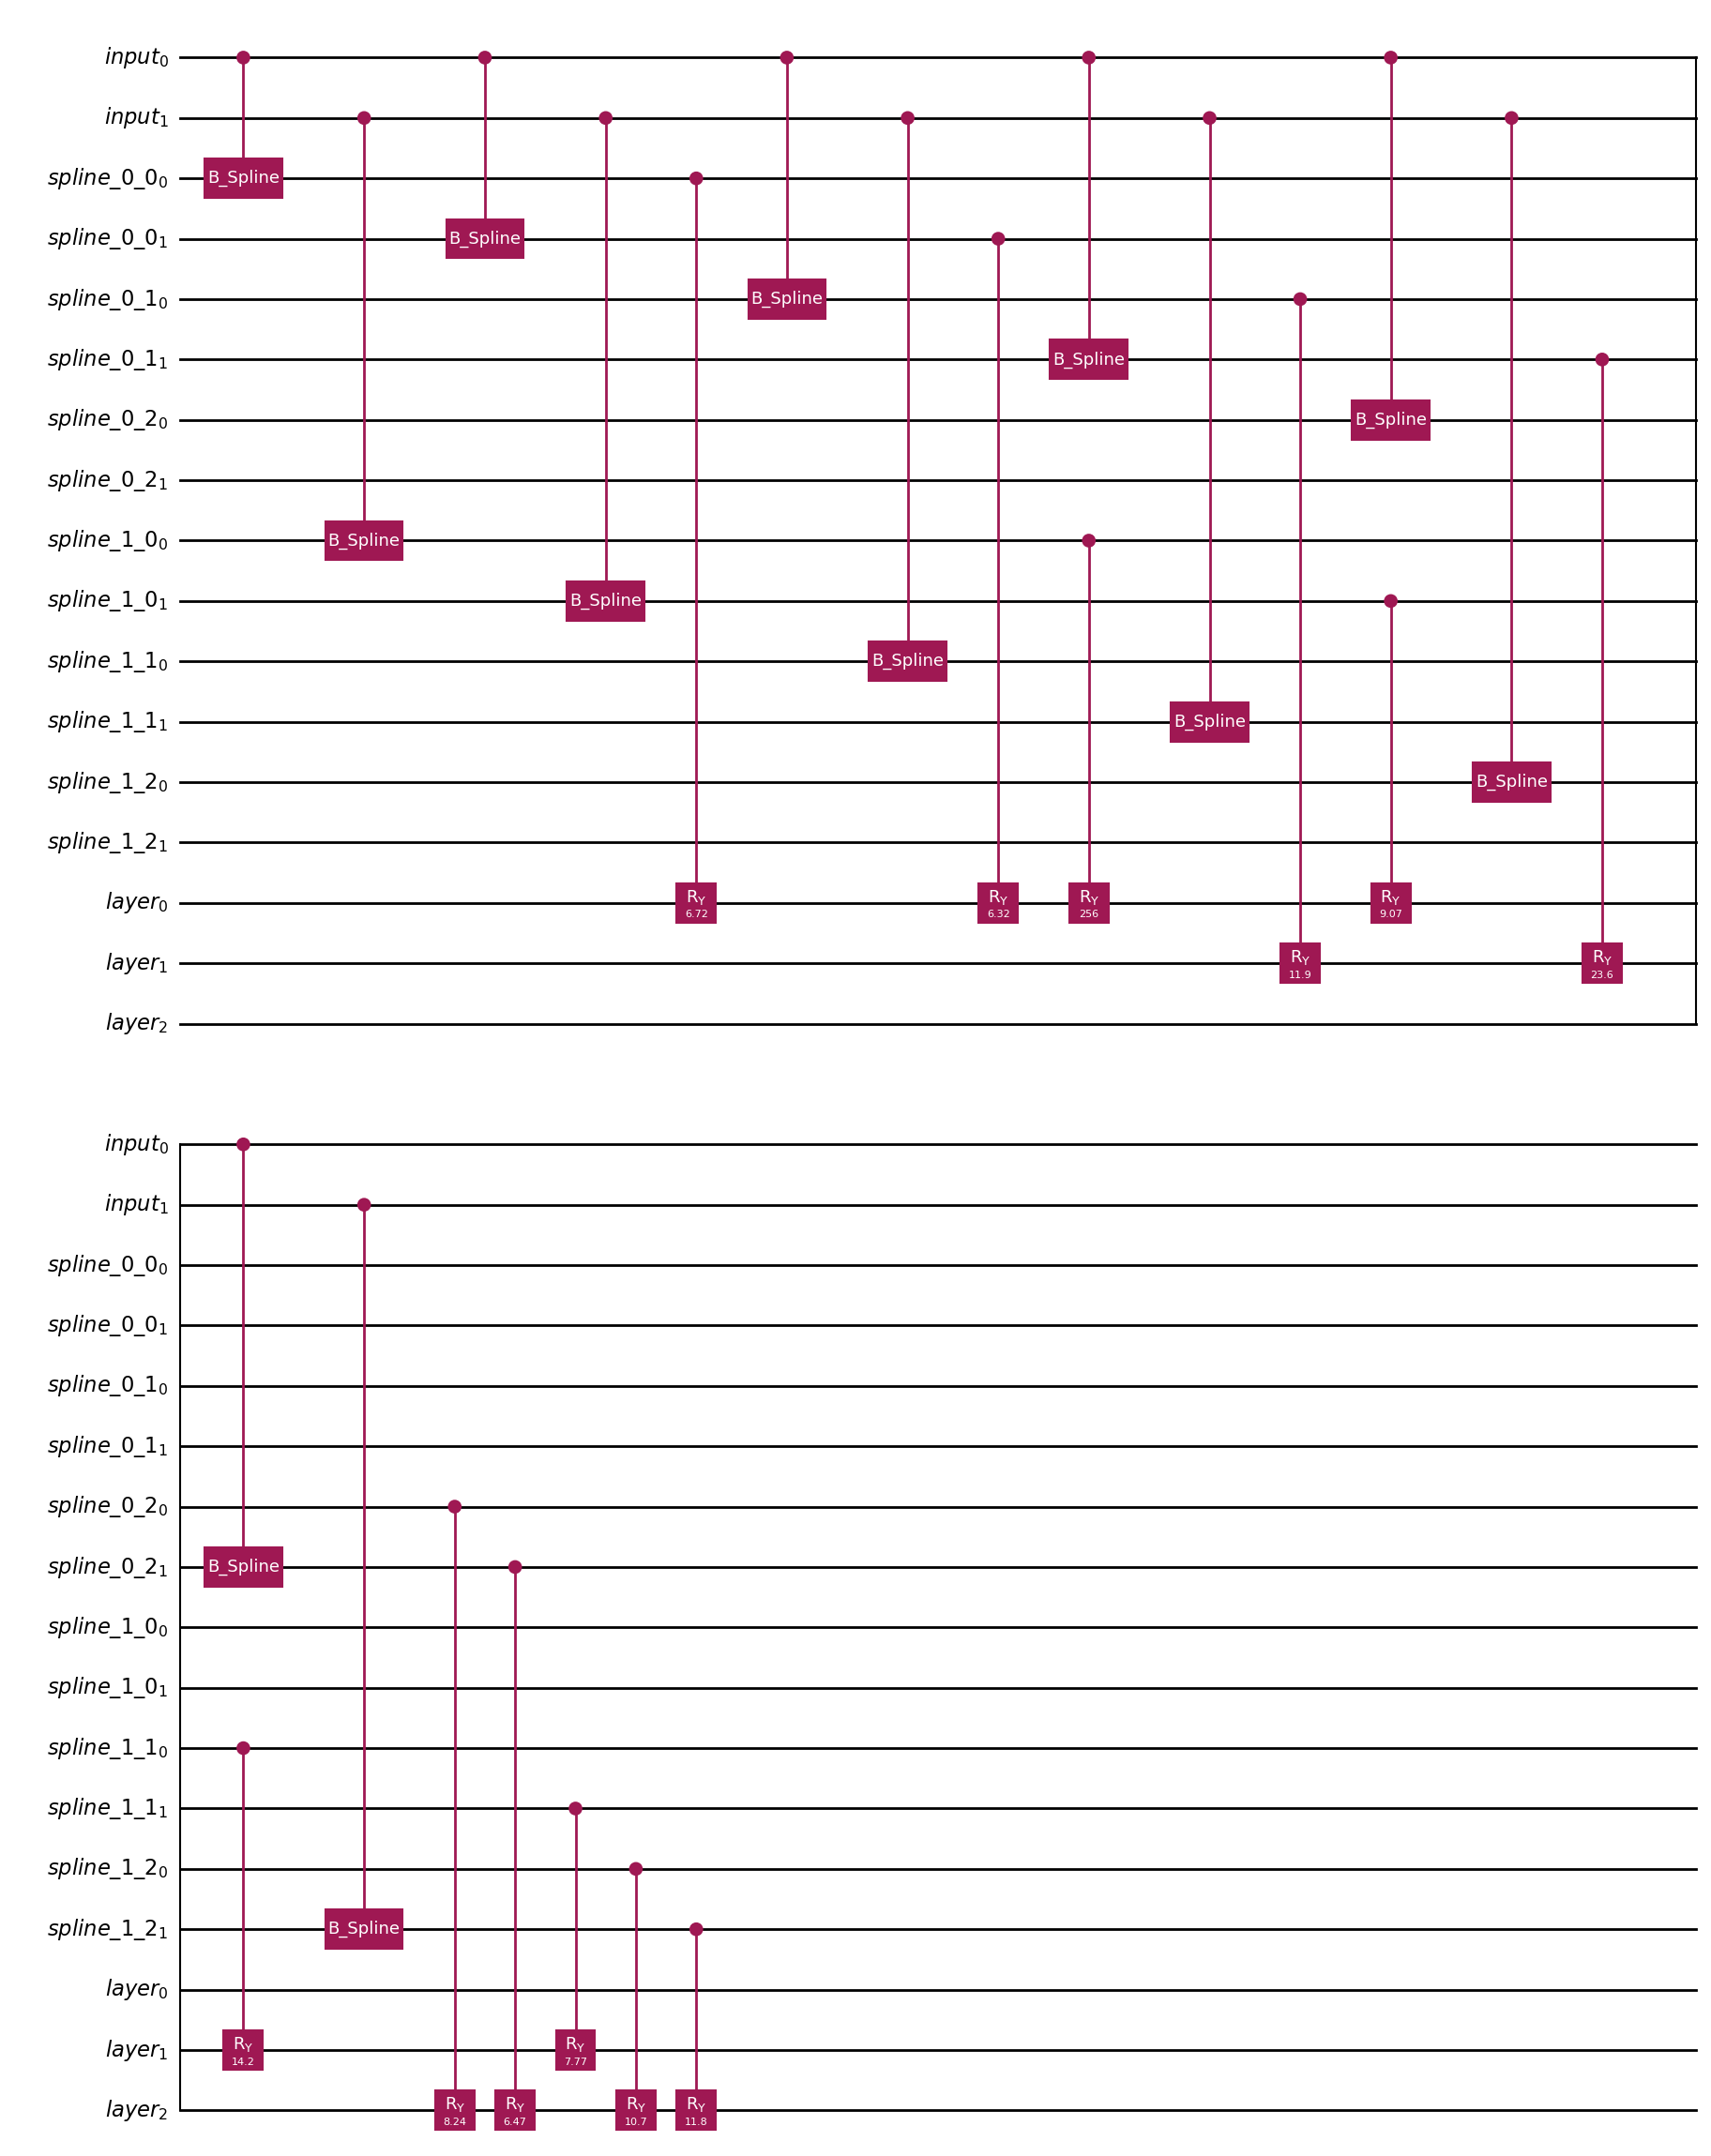

In [55]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit.visualization import plot_histogram

def spline_approx(coeffs, x):
    gate = QuantumCircuit(1)
    return gate.to_gate(label="B_Spline")

kan_arch = [2, 3, 1]
base_spline_count = 2

taylor_series_approx = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

# Make matrix of weights of size (kan_arch[0], kan_arch[1], base_spline_count)
# Each element is a list of weights for the spline approximation

weights = np.random.rand(kan_arch[0], kan_arch[1], base_spline_count)

input_register = QuantumRegister(kan_arch[0], 'input')
spline_registers = [QuantumRegister(base_spline_count, f'spline_{i}_{j}') for i in range(kan_arch[0]) for j in range(kan_arch[1])]
layer_output_registers = QuantumRegister(kan_arch[1], f'layer')

qc = QuantumCircuit(input_register, *spline_registers, layer_output_registers)

# Add Spline gate controlled by qubit 0
for i in range(kan_arch[0]):
    for j in range(kan_arch[1]):
        for k in range(base_spline_count):
            qc.append(spline_approx(taylor_series_approx, i).control(1), [input_register[i], spline_registers[i*kan_arch[1] + j][k]])

# Add Rotation gate controlled by spline qubits
for i in range(kan_arch[0]):
    for j in range(kan_arch[1]):
        for k in range(base_spline_count):
            qc.cry(2*np.pi/weights[i][j][k], spline_registers[i*kan_arch[1] + j][k], layer_output_registers[j])

qc.draw(output='mpl')
